<a href="https://colab.research.google.com/github/lovelyoyrmia/machine-learning-notebook/blob/main/digit_recognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [75]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

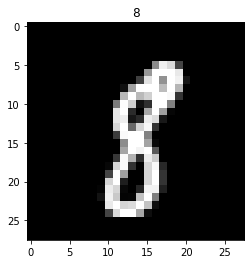

In [76]:
plt.imshow(X_train[300], cmap='gray')
plt.title(y_train[300])
plt.show()

In [77]:
from keras.layers import Dense, Conv2D, AveragePooling2D, Flatten
from keras.models import Sequential

In [78]:
model = Sequential()
model.add(Conv2D(filters=4, kernel_size=(5, 5), activation='relu', input_shape=(28, 28,1)))
model.add(AveragePooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=4, kernel_size=(7, 7), activation='relu'))
model.add(AveragePooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(units=10, activation='softmax'))

In [79]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [80]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 24, 24, 4)         104       
                                                                 
 average_pooling2d_8 (Averag  (None, 12, 12, 4)        0         
 ePooling2D)                                                     
                                                                 
 conv2d_10 (Conv2D)          (None, 6, 6, 4)           788       
                                                                 
 average_pooling2d_9 (Averag  (None, 3, 3, 4)          0         
 ePooling2D)                                                     
                                                                 
 flatten_4 (Flatten)         (None, 36)                0         
                                                                 
 dense_4 (Dense)             (None, 10)               

In [81]:
model.fit(X_train, y_train, epochs=1, batch_size=1)

60000/60000 [==============================] - 166s 3ms/step - loss: 0.4621 - acc: 0.8591


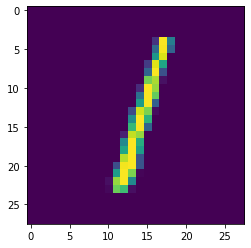

In [84]:
plt.imshow(X_test[2])

In [82]:
test = X_test[2].reshape(-1, 28, 28, 1)
test.shape

(1, 28, 28, 1)

In [83]:
import numpy as np

np.argmax(model.predict(test), axis=1)

array([1])

In [85]:
model.save('model_digit.h5')